# Pythonプログラムの解説

## 参考にしたコード

- ノードの形・色・枠線の変更

https://github.com/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/Overview-of-py4cytoscape.ipynb

- ファイルのインポート

https://github.com/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/importing-data-from-tables.ipynb
https://github.com/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/importing-network-from-table.ipynb

## 実行環境
- Python 3.10.4
- Cytoscape 3.11.0-SNAPSHOT
- py4cytoscape 1.11.0

## Jupyter-Bridge をセットアップ

Cytoscape と Jupyter 環境を橋渡しするための設定（jupyter-bridge）をします。

具体的には、ローカルの Cytoscape とリモートの Notebook の間で通信可能にする JavaScript と Python の仕組みが読み込まれます。



In [1]:
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Requirement already satisfied: py4cytoscape in c:\users\bb38121075\appdata\roaming\python\python310\site-packages (1.12.0)

Requirement already satisfied: pandas in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from py4cytoscape) (1.4.3)

Requirement already satisfied: networkx in c:\users\bb38121075\appdata\roaming\python\python310\site-packages (from py4cytoscape) (3.4.2)

Requirement already satisfied: requests in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from py4cytoscape) (2.32.3)

Requirement already satisfied: igraph in c:\users\bb38121075\appdata\roaming\python\python310\site-packages (from py4cytoscape) (0.11.8)

Requirement already satisfied: colorbrewer in c:\users\bb38121075\appdata\roaming\python\python310\site-packages (from py4cytoscape) (0.3)

Requirement already satisfied: chardet in c:\users\bb38121075\appdata\roaming\python\python310\site-packages (from py4cytoscape) (5.2.0)

Requirement already satisfied: decorator in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from py4cytoscape) (5.1.0)

Requirement already satisfied: backoff in c:\users\bb38121075\appdata\roaming\python\python310\site-packages (from py4cytoscape) (2.2.1)

Requirement already satisfied: colour in c:\users\bb38121075\appdata\roaming\python\python310\site-packages (from py4cytoscape) (0.1.5)

Requirement already satisfied: texttable>=1.6.2 in c:\users\bb38121075\appdata\roaming\python\python310\site-packages (from igraph->py4cytoscape) (1.7.0)

Requirement already satisfied: python-dateutil>=2.8.1 in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from pandas->py4cytoscape) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from pandas->py4cytoscape) (2022.2.1)

Requirement already satisfied: numpy>=1.21.0 in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from pandas->py4cytoscape) (1.23.2)

Requirement already satisfied: six>=1.5 in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from python-dateutil>=2.8.1->pandas->py4cytoscape) (1.16.0)

Requirement already satisfied: charset-normalizer<4,>=2 in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from requests->py4cytoscape) (2.0.12)

Requirement already satisfied: idna<4,>=2.5 in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from requests->py4cytoscape) (3.3)

Requirement already satisfied: urllib3<3,>=1.21.1 in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from requests->py4cytoscape) (1.26.9)

Requirement already satisfied: certifi>=2017.4.17 in c:\users\bb38121075\appdata\local\programs\python\python310\lib\site-packages (from requests->py4cytoscape) (2021.10.8)

Loading Javascript client ... 91f72454-cb23-432c-972e-8f8f956db321 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

## py4cytoscapeをインポート

Cytoscapeをあらかじめ開いておき、py4cytoscapeを使いCytoscapeと接続できているか確認します。



In [2]:
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.11.0-SNAPSHOT',
 'automationAPIVersion': '1.12.0',
 'py4cytoscapeVersion': '1.12.0'}

## ネットワーク（sif）、ノード属性（tsv）をCytoscapeにインポート

In [3]:
import os
import sys
import pandas as pd

In [4]:
#ネットワークファイルを必ず先にインポートします
p4c.import_network_from_file('7network.sif')

{'networks': [128], 'views': [9086]}

In [5]:
#ノード属性のtsvファイルをpandasで読みます。
#tsvファイルはTabで分けられているので、tab区切りにして読み込みます。
#ファイルに日本語を含むので、文字化けを無くすためutf-8で読み込ませます。
node7 = pd.read_csv('7node.tsv', sep='\t', encoding='utf-8')
print(node7)

       ID      所属  コミュニティ
0    2104   第5開発部       3
1    2304   第2開発部       2
2    2301   第1開発部       3
3     819  コーポレート       4
4     822  コーポレート       4
..    ...     ...     ...
142   127   第2開発部       2
143   115  コーポレート       0
144   221   第3開発部       1
145   147   第4開発部       0
146    35   第4開発部       0

[147 rows x 3 columns]


In [6]:
#なかなかtsvファイルをCytoscapeに渡すことができず原因を調べたところ、
#原因はtsvファイルのID列の型が整数型になっていることでした。
print(node7.dtypes)


ID         int64
所属        object
コミュニティ     int64
dtype: object


In [7]:
#IDを文字列に変更させます（int64 → object）
node7['ID'] = node7['ID'].astype(str)
print(node7.dtypes)


ID        object
所属        object
コミュニティ     int64
dtype: object


In [8]:
#pandasで読み込ませた属性tsvファイルをCytoscapeに渡す
p4c.load_table_data(node7, data_key_column='ID')

'Success: Data loaded in defaultnode table'

## py4cytoscapeを使いグラフの見た目を調整する

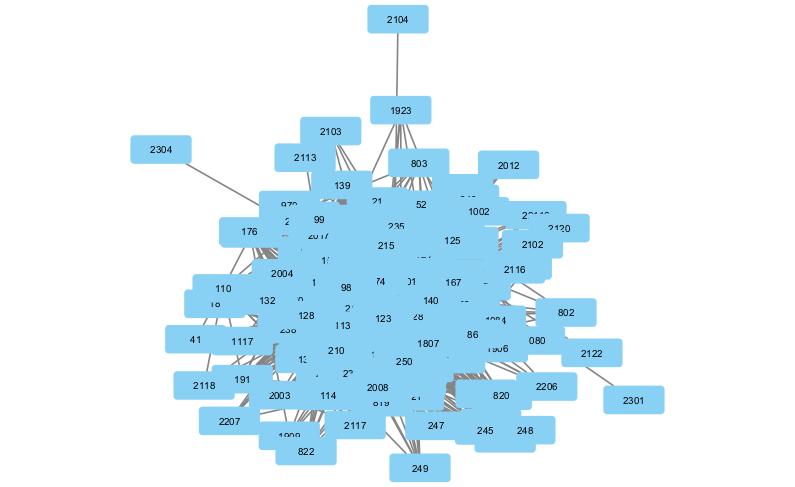

In [9]:
#現時点のグラフ
p4c.notebook_export_show_image()

In [10]:
p4c.set_visual_style('default')
# force-directed レイアウトでノード間隔を広げる
p4c.layout_network('force-directed defaultSpringLength=500')
# ノードのサイズを小さくする
p4c.set_node_size_default(40)
#エッジの太さを細くする
p4c.set_edge_line_width_default(1)

style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.


''

In [ ]:
print(node7['所属'].unique())

['第5開発部' '第2開発部' '第1開発部' 'コーポレート' '第3開発部' '第4開発部' 'システム開発部']
